## Lectura 1-3: Visualización de datos con Python


Este cuaderno enseña los fundamentos de dos de las librerías de visualización más populares en el universo Python - `Matplotlib` y `Seaborn`. Vamos a mostrar, cómo el uso de código mínimo, puede crear varios tipos de parcelas - 

* scatterplot, 
* boxplot, 
* histograma,
* gráfico de violín,
* gráficos de barras,
* mapa de calor
* Gráfico lineal de series temporales

## Matplotlib

### Gráfico de dispersión - básico
Empezamos definiendo algunos datos. Supongamos que recopilamos información sobre la edad (en años), la altura (en cm) y el peso (en kilogramos) de unos cuantos pacientes que acuden a una clínica.

In [19]:
people = ['Ann','Brandon','Chen','David','Emily','Farook',
          'Gagan','Hamish','Imran','Julio','Katherine','Lily']
age = [21,12,32,45,37,18,28,52,5,40,48,15]
weight = [55,35,77,68,70,60,72,69,18,65,82,48]
height = [160,135,170,165,173,168,175,159,105,171,155,158]

Podemos preguntarnos, ¿existe alguna relación entre estas características? Podemos trazar la edad frente a la altura o la altura frente al peso con una cantidad mínima de código.

In [20]:
import matplotlib.pyplot as plt

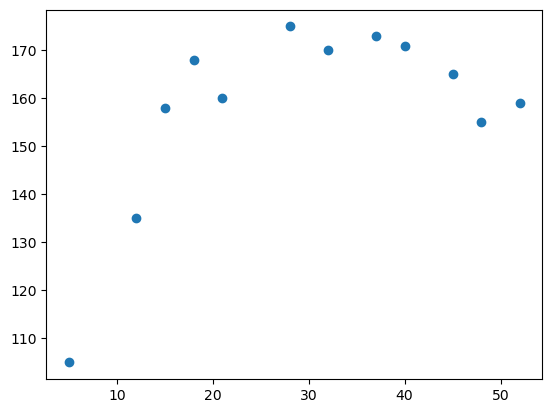

In [21]:
plt.scatter(age, height)
plt.show()

### Scatterplot - costumizando el gráfico

El gráfico anterior está bien, pero parece básico. Podemos añadirle algunos detalles con un código sencillo.

* Tamaño de la figura
* Título principal (y tamaño de la fuente)
* Etiquetas X e Y (y tamaño de la fuente)
* Marcas X e Y (y tamaño de la fuente)
* Cuadrícula
* Texto de etiquetado
* Leyenda
* Líneas verticales (u horizontales)

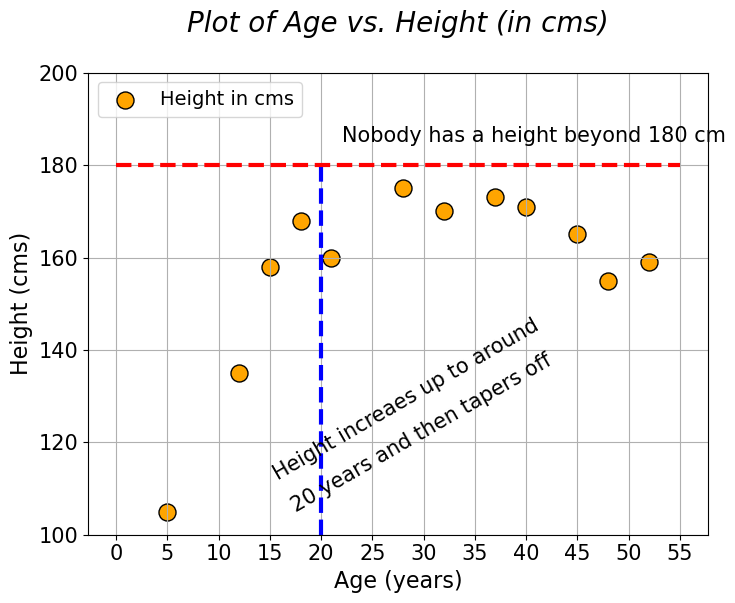

In [22]:
# Set figure size
plt.figure(figsize=(8,6))

# Add a main title
plt.title("Plot of Age vs. Height (in cms)\n",fontsize=20, fontstyle='italic')

# X- and Y-label with fontsize
plt.xlabel("Age (years)",fontsize=16)
plt.ylabel("Height (cms)",fontsize=16)

# Turn on grid
plt.grid (True)

# Set Y-axis limit
plt.ylim(100,200)

# X- and Y-axis ticks customization with fontsize and placement
plt.xticks([i*5 for i in range(12)],fontsize=15)
plt.yticks(fontsize=15)

# Main plotting function with choice of color, marker size, and marker edge color
plt.scatter(x=age,y=height,c='orange',s=150,edgecolors='k')

# Adding bit of text to the plot
plt.text(x=15,y=105,s="Height increaes up to around \n20 years and then tapers off",fontsize=15, 
         rotation=30, linespacing=2)
plt.text(x=22,y=185,s="Nobody has a height beyond 180 cm",fontsize=15)

# Adding a vertical line
plt.vlines(x=20,ymin=100,ymax=180,linestyles='dashed',color='blue',lw=3)

# Adding a horizontal line
plt.hlines(y=180,xmin=0,xmax=55,linestyles='dashed',color='red',lw=3)

# Adding a legend
plt.legend(['Height in cms'],loc=2,fontsize=14)

# Final show method
plt.show()

### Gráfico de barras

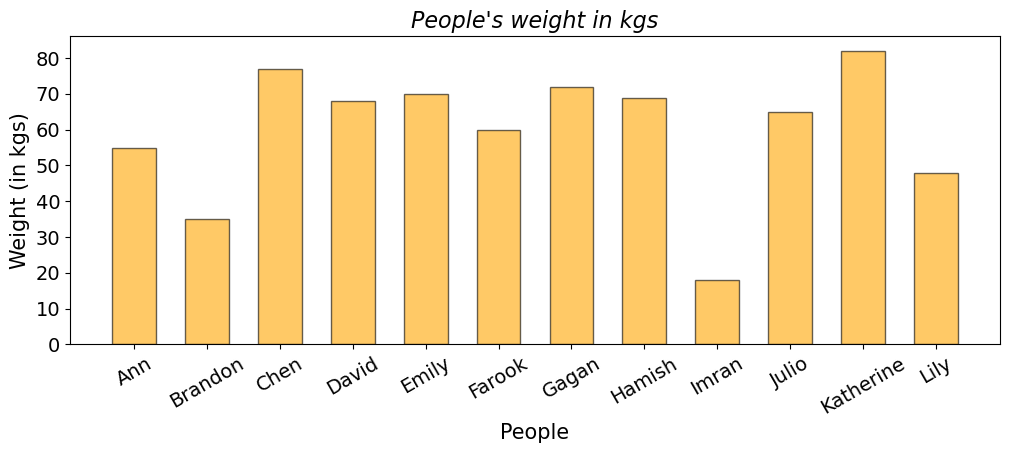

In [23]:
plt.figure(figsize=(12,4))
plt.title("People's weight in kgs",fontsize=16, fontstyle='italic')
# Main plot function 'bar'
plt.bar(x=people,height=weight, width=0.6,color='orange',edgecolor='k',alpha=0.6)
plt.xlabel("People",fontsize=15)
plt.xticks(fontsize=14,rotation=30)
plt.yticks(fontsize=14)
plt.ylabel("Weight (in kgs)",fontsize=15)
plt.show()

### Histograma

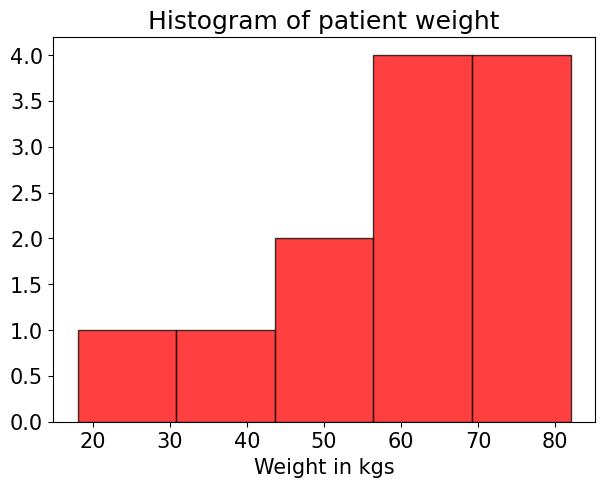

In [24]:
import numpy as np
plt.figure(figsize=(7,5))
# Main plot function 'hist'
plt.hist(weight,color='red',edgecolor='k', alpha=0.75,bins=5)
plt.title("Histogram of patient weight",fontsize=18)
plt.xlabel("Weight in kgs",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Gráfico de líneas simple

In [25]:
days = np.arange(1,31)
candidate_A = 50+days*0.07+2*np.random.randn(30)
candidate_B = 50-days*0.1+3*np.random.randn(30)

In [26]:
# Determine the minimum and maximum of stock prices
ymin = min(candidate_A.min(),candidate_B.min())
ymax = max(candidate_A.max(),candidate_B.max())

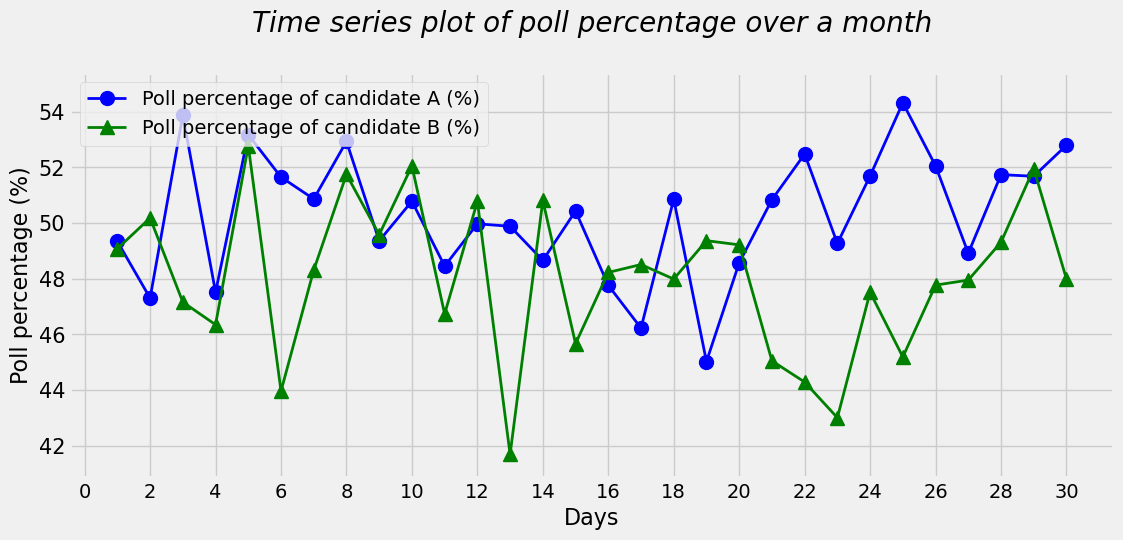

In [27]:
# Set style
plt.style.use('fivethirtyeight')

plt.figure(figsize=(12,5))
plt.title("Time series plot of poll percentage over a month\n",fontsize=20, fontstyle='italic')
plt.xlabel("Days",fontsize=16)
plt.ylabel("Poll percentage (%)",fontsize=16)
plt.grid (True)
plt.ylim(ymin*0.98,ymax*1.02)
plt.xticks([i*2 for i in range(16)],fontsize=14)
plt.yticks(fontsize=15)

# Main plotting function - plot (note markersize, lw (linewidth) arguments)
plt.plot(days,candidate_A,'o-',markersize=10,c='blue',lw=2)
plt.plot(days,candidate_B,'^-',markersize=10,c='green',lw=2)

plt.legend(['Poll percentage of candidate A (%)', 'Poll percentage of candidate B (%)'],loc=2,fontsize=14)
plt.show()

### Boxplot

![boxplot](https://miro.medium.com/max/1838/1*2c21SkzJMf3frPXPAR_gZA.png)

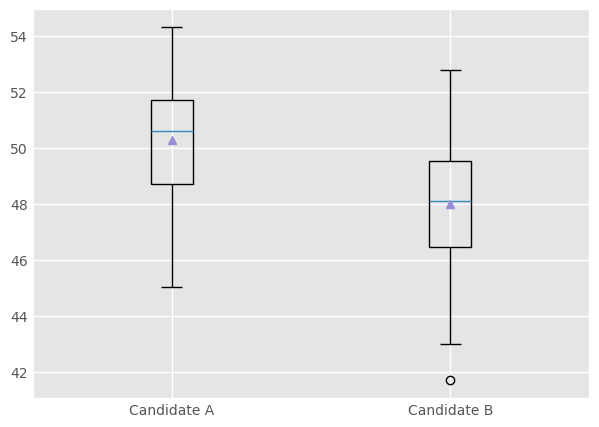

In [28]:
plt.style.use('ggplot')
# Note how to convert default numerical x-axis ticks to the list of string by passing two lists 
plt.boxplot(x=[candidate_A,candidate_B],showmeans=True)
plt.grid(True)
plt.xticks([1,2],['Candidate A','Candidate B'])
#plt.yticks(fontsize=15)
plt.show()

## ¡Pandas DataFrames soporta algunas visualizaciones directamente!

In [40]:
import pandas as pd
from sklearn.datasets import load_wine


In [30]:
data= load_wine()

# convert to pandas dataframe include the class
df = pd.DataFrame(data.data, columns=data.feature_names)
df['class'] = data.target

In [41]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [42]:
# Just to set the Matplotlib style to default
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

### Diagrama de dispersión

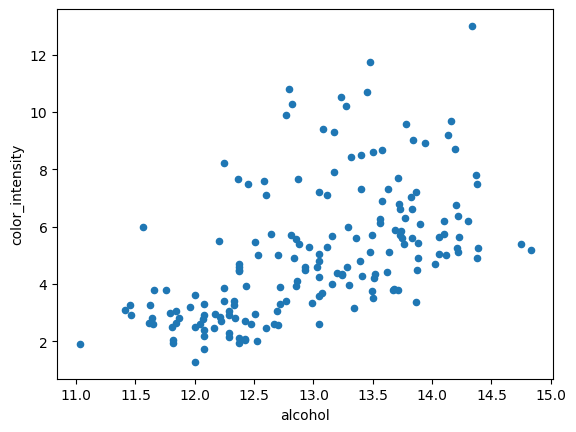

In [43]:
df.plot.scatter('alcohol','color_intensity')
plt.show()

### Histograma

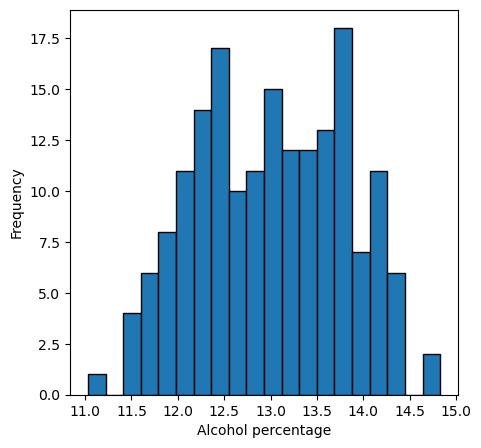

In [44]:
df['alcohol'].plot.hist(bins=20,figsize=(5,5),edgecolor='k')
plt.xlabel('Alcohol percentage')
plt.show()

## Seaborn - visualizaciones estadísticas avanzadas

In [45]:
import seaborn as sns

### Boxplot separados por clases/grupos de datos

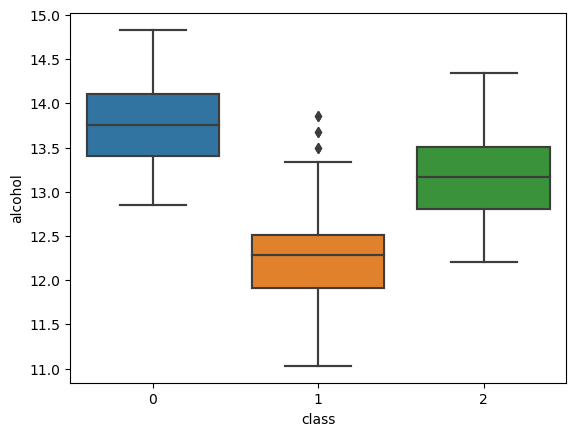

In [47]:
sns.boxplot(x='class',y='alcohol',data=df)
plt.show()

### Violin plots (combinación de boxplot e histograma/densidad kernel)

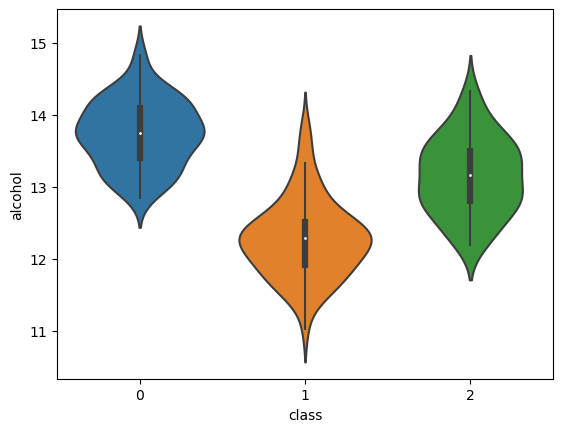

In [48]:
sns.violinplot(x='class',y='alcohol',data=df)
plt.show()

### `regplot` 

- calcula y traza el ajuste de regresión lineal junto con el intervalo de confianza

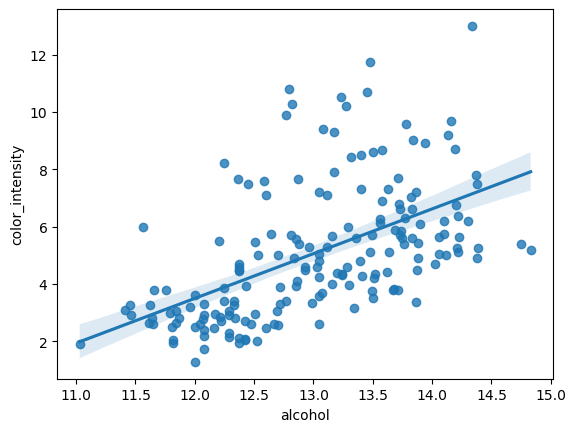

In [49]:
sns.regplot(x='alcohol',y='color_intensity',data=df)
plt.show()

### `lmplot` 

- combinación de `regplot` con grid para visualizar a través de varios grupos/clases

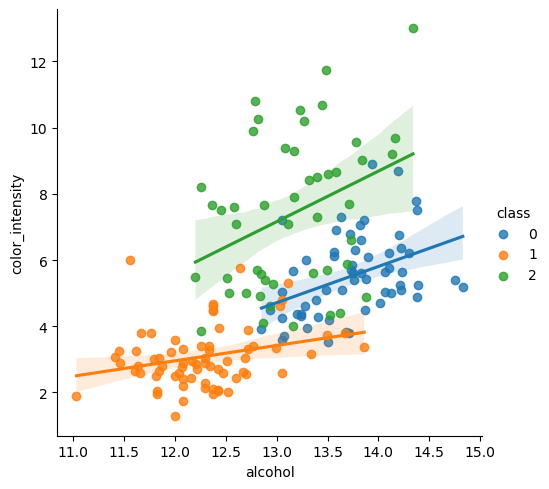

In [51]:
sns.lmplot(x='alcohol',y='color_intensity',hue='class',data=df)
plt.show()

## Matriz de correlación y mapa de calor

In [ ]:
import numpy as np

In [ ]:
corr_mat=np.corrcoef(df,rowvar=False)

In [ ]:
corr_mat.shape

(14, 14)

In [ ]:
corr_df = pd.DataFrame(corr_mat,columns=df.columns,index=df.columns)

In [ ]:
print(np.round(corr_mat,3))

[[ 1.    -0.328  0.438 -0.05   0.518 -0.209 -0.719 -0.847  0.489 -0.499
   0.266 -0.617 -0.788 -0.634]
 [-0.328  1.     0.094  0.212 -0.31   0.271  0.289  0.237 -0.156  0.137
   0.546 -0.072  0.072  0.644]
 [ 0.438  0.094  1.     0.164  0.289 -0.055 -0.335 -0.411  0.293 -0.221
   0.249 -0.561 -0.369 -0.192]
 [-0.05   0.212  0.164  1.     0.443  0.287  0.129  0.115  0.186  0.01
   0.259 -0.075  0.004  0.224]
 [ 0.518 -0.31   0.289  0.443  1.    -0.083 -0.321 -0.351  0.362 -0.197
   0.019 -0.274 -0.277 -0.441]
 [-0.209  0.271 -0.055  0.287 -0.083  1.     0.214  0.196 -0.256  0.236
   0.2    0.055  0.066  0.393]
 [-0.719  0.289 -0.335  0.129 -0.321  0.214  1.     0.865 -0.45   0.612
  -0.055  0.434  0.7    0.498]
 [-0.847  0.237 -0.411  0.115 -0.351  0.196  0.865  1.    -0.538  0.653
  -0.172  0.543  0.787  0.494]
 [ 0.489 -0.156  0.293  0.186  0.362 -0.256 -0.45  -0.538  1.    -0.366
   0.139 -0.263 -0.503 -0.311]
 [-0.499  0.137 -0.221  0.01  -0.197  0.236  0.612  0.653 -0.366  1.
  -0.

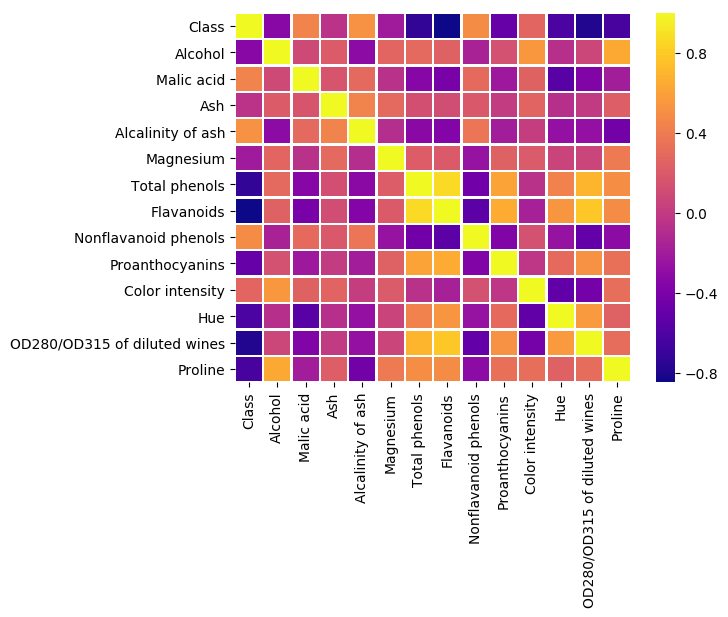

In [ ]:
sns.heatmap(corr_df,linewidth=1,cmap='plasma')
plt.show()